In [1]:
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import pandas as pd
import numpy as np
from PIL import Image

import umap

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

## Clean data

In [3]:
# decals = pd.read_parquet('../zoobot_private/gz_decals_auto_posteriors.parquet', columns=['iauname'])
# # # decals = pd.read_parquet('../zoobot_private/gz_decals_auto_posteriors.parquet')
# safe_galaxies = set(decals['iauname'])

In [3]:
file_locs = glob.glob('/media/walml/beta1/cnn_features/*_output_*.csv')
len(file_locs)

117

In [5]:
image_format = 'png'
    
for loc in file_locs:
    print(loc)
    clean_loc = loc.replace('_output_', '_cleaned_').replace('.csv', '.parquet')
    if not os.path.isfile(clean_loc):

        features_df = pd.read_csv(loc)
        feature_cols = [col for col in features_df if col.startswith('feat')]

        for col in feature_cols:
            features_df[col] = features_df[col].apply(lambda x: float(x.replace('[', '').replace(']', '')))  # extract from list e.g. [0.1456] to 0.1456

        features_df['png_loc'] = features_df['image_loc'].str.replace('/raid/scratch/walml/galaxy_zoo/decals/png', '/media/walml/beta1/decals/png_native/dr5')

    #     assert all([os.path.isfile(x) for x in features_df['filename']])
        del features_df['image_loc']
        features_df['iauname'] = list(features_df['png_loc'].apply(lambda x: x.split('/')[-1].replace(f'.{image_format}', '')))

    #         features_df = features_df[features_df['objid'].isin(safe_galaxies)]

        # must be indexed by the names of the png files for astronomaly to know which image has which features
        # cast to list to avoid pandas renaming index to image_loc - too clever for its own good

        features_df.to_parquet(clean_loc)

/media/walml/beta1/cnn_features/dr5_b0_full_output_J000.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J001.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J002.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J003.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J004.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J005.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J010.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J011.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J012.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J013.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J014.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J015.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J020.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J021.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J022.csv
/media/walml/beta1/cnn_features/dr5_b0_full_output_J023.csv
/media/walml/beta1/cnn_features/dr5_b0_f

In [3]:
cleaned_locs = glob.glob('/media/walml/beta1/cnn_features/*_cleaned_*.parquet')

data = []
for loc in cleaned_locs:
    data.append(pd.read_parquet(loc))
features_df = pd.concat(data)
print(len(features_df))

343128


In [5]:
features_df.sort_values('png_loc').to_parquet('/media/walml/beta1/cnn_features/cnn_features_concat.parquet', index=False)
# will merge this with the carefully-cut list of <=dr5 galaxies below to apply those cuts
del features_df

## Load data

In [3]:
# get an NSA catalog which includes both iauname and petrotheta/elpetro_absmag_r - v1_0_1
# check petrotheta cut and apply r cuts matching dr8 and bulk of gz decals - 14 to 17.77

# then get joint catalog and drop images with too many missing pixels - count to catalog so can change later, then to 5% or 7%


# check for duplicates in both dr5 and dr8 using ra/dec and crossmatch

# then create features and filename catalog in style of mid part of dr8 script

# then concat with dr8 table
# then apply rest of dr8  script

In [4]:
from astropy.table import Table

In [5]:
# nsa = pd.read_csv('/media/walml/beta1/galaxy_zoo/decals/catalogs/nsa_v1_0_1_cached.csv')  # all nsa, but not crossmatched
nsa = Table.read('/media/walml/beta1/galaxy_zoo/decals/catalogs/raw/nsa_v1_0_1.fits')  # ?
# nsa = pd.read_csv('/media/walml/beta1/galaxy_zoo/decals/catalogs/decals_dr5_uploadable_master_catalog_nov_2019.csv')  # crossmatched but excludes dr1/2
# nsa = pd.read_csv('/home/walml/repos/zoobot_private/data/decals/decals_master_catalog.csv')  # similarly as above


In [6]:
nsa.columns

<TableColumns names=('IAUNAME','SUBDIR','RA','DEC','ISDSS','INED','ISIXDF','IALFALFA','IZCAT','ITWODF','MAG','Z','ZSRC','SIZE','RUN','CAMCOL','FIELD','RERUN','XPOS','YPOS','NSAID','ZDIST','SERSIC_NMGY','SERSIC_NMGY_IVAR','SERSIC_OK','SERSIC_RNMGY','SERSIC_ABSMAG','SERSIC_AMIVAR','EXTINCTION','SERSIC_KCORRECT','SERSIC_KCOEFF','SERSIC_MTOL','SERSIC_B300','SERSIC_B1000','SERSIC_METS','SERSIC_MASS','XCEN','YCEN','NPROF','PROFMEAN','PROFMEAN_IVAR','QSTOKES','USTOKES','BASTOKES','PHISTOKES','PETRO_FLUX','PETRO_FLUX_IVAR','FIBER_FLUX','FIBER_FLUX_IVAR','PETRO_BA50','PETRO_PHI50','PETRO_BA90','PETRO_PHI90','SERSIC_FLUX','SERSIC_FLUX_IVAR','SERSIC_N','SERSIC_BA','SERSIC_PHI','ASYMMETRY','CLUMPY','DFLAGS','AID','PID','DVERSION','PROFTHETA','PETRO_THETA','PETRO_TH50','PETRO_TH90','SERSIC_TH50','PLATE','FIBERID','MJD','RACAT','DECCAT','ZSDSSLINE','SURVEY','PROGRAMNAME','PLATEQUALITY','TILE','PLUG_RA','PLUG_DEC','ELPETRO_BA','ELPETRO_PHI','ELPETRO_FLUX_R','ELPETRO_FLUX_IVAR_R','ELPETRO_THETA_R','EL

In [7]:
nsa

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY [7],SERSIC_NMGY_IVAR [7],SERSIC_OK,SERSIC_RNMGY [7],SERSIC_ABSMAG [7],SERSIC_AMIVAR [7],EXTINCTION [7],SERSIC_KCORRECT [7],SERSIC_KCOEFF [5],SERSIC_MTOL [7],SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETRO_FLUX [7],PETRO_FLUX_IVAR [7],FIBER_FLUX [7],FIBER_FLUX_IVAR [7],PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX [7],SERSIC_FLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX [7],ELPETRO_FLUX_IVAR [7],ELPETRO_TH50 [7],ELPETRO_TH90 [7],ELPETRO_APCORR_R,ELPETRO_APCORR [7],ELPETRO_APCORR_SELF [7],ELPETRO_NMGY [7],ELPETRO_NMGY_IVAR [7],ELPETRO_OK,ELPETRO_RNMGY [7],ELPETRO_ABSMAG [7],ELPETRO_AMIVAR [7],ELPETRO_KCORRECT [7],ELPETRO_KCOEFF [5],ELPETRO_MASS,ELPETRO_MTOL [7],ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,int32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,28.661283 .. 2337.7668,-15.124495 .. -19.915525,293.50247 .. 1094.6666,-0.010805 .. 0.009306902,3.9630737e-05 .. 2.6251464e-06,6833158000.0,0.00017553588 .. 1.14686,0.004447123,0.09061434,0.025269886,0.0
J094630.85-004554.5,09h/m00/J094630.85-004554.5,146.6285851269414,-0.7651620976591762,1,-1,-1,-1,-1,-1,17.318521,0.06465632,sdss,0.06491773,1239,2,175,301,735.56384,1277.3636,1,0.06403577,2.4606192 .. 443.66675,5.447516 .. 0.006137319,1,2.6

In [8]:
nsa['ELPETRO_ABSMAG_R'] = nsa['ELPETRO_ABSMAG'][:, 4]
nsa['SERSIC_NMGY_R'] = nsa['SERSIC_NMGY'][:, 4]

In [9]:
cols_to_keep = ['iauname', 'ra', 'dec', 'petro_theta', 'petro_th50', 'petro_th90', 'elpetro_absmag_r', 'sersic_nmgy_r']
for col in cols_to_keep:
    nsa[col] = nsa[col.upper()]

In [10]:
nsa = nsa[cols_to_keep].to_pandas()

In [11]:

# print(nsa['petro_theta'].min())  # cut not yet applied
good_radius = nsa['petro_theta'] > 3.
print(good_radius.mean())

0.9353454659975149


/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'galaxies')

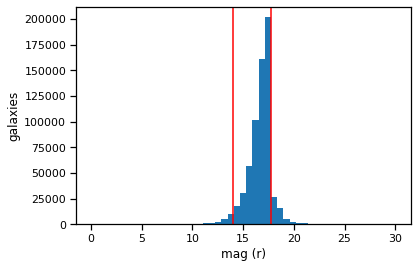

In [12]:
# http://www.sdss3.org/dr8/algorithms/magnitudes.php
nsa['mag_r'] = 22.5 - 2.5 * np.log10(nsa['sersic_nmgy_r'])

bad_mag = np.isnan(nsa['mag_r']) | np.isinf(nsa['mag_r'])

plt.hist(nsa[~bad_mag]['mag_r'], bins=np.linspace(0., 30.))
plt.axvline(17.77, color='r')
plt.axvline(14., color='r')
plt.xlabel('mag (r)')
plt.ylabel('galaxies')

In [13]:
np.nan < 17.77, np.nan > 14  # nan will be removed by this cut as well, no need to exclude separately

(False, False)

In [14]:
good_mag = (nsa['mag_r'] < 17.77) & (nsa['mag_r'] > 14.)
print(good_mag.mean())
print((good_mag & good_radius).mean())

0.8921811200029934
0.8496216922431709


In [15]:

# radius cut was already applied, but no mag cut. No previous galaxies were removed
# galaxies with missing pixels already removed
dr5_catalog = Table.read('/media/walml/beta1/galaxy_zoo/decals/catalogs/dr5_nsa_v1_0_0_to_upload.fits')
print(len(dr5_catalog))
dr5_catalog['fits_ready'].mean(), dr5_catalog['png_ready'].mean()

343128


(1.0, 1.0)

In [16]:
dr5_catalog.columns

<TableColumns names=('iauname','nsa_id','ra','dec','petrotheta','petroth50','petroth90','z','fits_loc','png_loc','fits_ready','fits_filled','png_ready')>

In [17]:
# just checking they merge correctly
test_df = pd.merge(nsa, dr5_catalog[['iauname', 'png_loc']].to_pandas(), on='iauname', how='inner')
print(len(nsa), len(dr5_catalog), len(test_df))

641409 343128 343128


In [18]:
safe_df = pd.merge(nsa[good_mag & good_radius], dr5_catalog[['iauname', 'png_loc']].to_pandas(), on='iauname', how='inner')
print(len(nsa), len(dr5_catalog), len(safe_df))

641409 343128 305657


In [19]:
safe_df['iauname'] = safe_df['iauname'].str.decode('utf8')
safe_df['png_loc'] = safe_df['png_loc'].str.decode('utf8')
safe_df['png_loc'] = safe_df['png_loc'].str.replace('/Volumes/alpha/decals', '/media/walml/beta1/decals')


In [20]:
safe_df['png_loc']

0         /media/walml/beta1/decals/png_native/dr5/J094/...
1         /media/walml/beta1/decals/png_native/dr5/J094/...
2         /media/walml/beta1/decals/png_native/dr5/J094/...
3         /media/walml/beta1/decals/png_native/dr5/J094/...
4         /media/walml/beta1/decals/png_native/dr5/J094/...
                                ...                        
305652    /media/walml/beta1/decals/png_native/dr5/J143/...
305653    /media/walml/beta1/decals/png_native/dr5/J143/...
305654    /media/walml/beta1/decals/png_native/dr5/J235/...
305655    /media/walml/beta1/decals/png_native/dr5/J235/...
305656    /media/walml/beta1/decals/png_native/dr5/J235/...
Name: png_loc, Length: 305657, dtype: object

In [21]:
assert os.path.isfile(safe_df['png_loc'][0])

In [22]:
safe_df.head()

,iauname,ra,dec,petro_theta,petro_th50,petro_th90,elpetro_absmag_r,sersic_nmgy_r,mag_r,png_loc
0,J094651.40-010228.5,146.714215,-1.041280,7.247893,3.464192,10.453795,-19.303656,1789.257202,14.368319,/media/walml/beta1/decals/png_native/dr5/J094/...
1,J094630.85-004554.5,146.628585,-0.765162,5.617822,2.326989,6.721991,-19.976496,229.840393,16.596434,/media/walml/beta1/decals/png_native/dr5/J094/...
2,J094631.59-005917.7,146.631706,-0.988347,4.769891,2.278736,5.177910,-18.431812,82.228149,17.712448,/media/walml/beta1/decals/png_native/dr5/J094/...
3,J094744.18-004013.4,146.934129,-0.670405,6.243227,2.655191,9.177605,-21.559162,277.761200,16.390821,/media/walml/beta1/decals/png_native/dr5/J094/...
4,J094751.74-003242.0,146.963500,-0.544776,8.891541,4.383704,10.253274,-19.100992,132.772156,17.192232,/media/walml/beta1/decals/png_native/dr5/J094/...


In [23]:
safe_df.to_parquet('/media/walml/beta1/cnn_features/sub_dr5_catalog_mag_radius_and_pixel_cuts.parquet', index=False)

In [ ]:
# will need to restart kernel for memory issues

In [3]:
full_features = pd.read_parquet('/media/walml/beta1/cnn_features/cnn_features_concat.parquet')
safe_df = pd.read_parquet('/media/walml/beta1/cnn_features/sub_dr5_catalog_mag_radius_and_pixel_cuts.parquet')

In [4]:
feature_cols = [col for col in full_features.columns.values if col.startswith('feat_')]

In [5]:
df = pd.merge(safe_df, full_features[feature_cols + ['iauname']], how='inner', on='iauname')
print(len(safe_df), len(full_features), len(df))
assert len(safe_df) == len(df)

305657 343128 305657


In [6]:
df.sort_values('png_loc').to_parquet('/media/walml/beta1/cnn_features/dr5_b0_full_features_and_safe_catalog.parquet', index=False)  # now ready to use at the end of astronomaly/prepare_cnn_features.py

In [7]:
df[['ra', 'dec']]

,ra,dec
0,146.714215,-1.041280
1,146.628585,-0.765162
2,146.631706,-0.988347
3,146.934129,-0.670405
4,146.963500,-0.544776
...,...,...
305652,219.692814,-1.498367
305653,219.551942,-1.517284
305654,357.755712,-10.010851
305655,358.197549,-10.883763


In [44]:
# make some nsa-specific cuts
# good_nmgy = vols['sersic_nmgy_r'] < 3500
# good_petro_th = (vols['petro_th50'] < 20) & (vols['petro_th90'] < 30)
good_petro_th = (vols['petro_th50'] < 10) & (vols['petro_th90'] < 15)  # more aggressive

253286

In [6]:
# decals_dr5_master = pd.read_csv('/home/walml/repos/zoobot_private/data/decals/decals_master_catalog.csv')  # inc some nsa values
# len(decals_dr5_master)

253225

In [7]:
del nsa

In [45]:
file_loc

'/media/walml/beta1/decals/png_native/dr5/J120/J120143.46+001059.2.png'

In [47]:
eye = vols[vols['iauname'] == "J120143.46+001059.2"].squeeze()
eye

ra                           180.431
dec                         0.183135
sersic_nmgy_r                78.8052
petro_th50                   6.08063
petro_th90                   11.6994
iauname          J120143.46+001059.2
redshift                    0.104358
Name: 245332, dtype: object

226247


In [9]:


# features_df = features_df.set_index('objid')
# features_df = features_df.sort_index()

,feat_0_pred,feat_1_pred,feat_2_pred,feat_3_pred,feat_4_pred,feat_5_pred,feat_6_pred,feat_7_pred,feat_8_pred,feat_9_pred,...,feat_1272_pred,feat_1273_pred,feat_1274_pred,feat_1275_pred,feat_1276_pred,feat_1277_pred,feat_1278_pred,feat_1279_pred,filename,objid
774,0.001404,-0.000234,0.066015,-0.001029,-0.002367,0.002224,-0.002591,-0.001308,-0.105498,-0.019823,...,-0.001173,-0.029192,-0.000692,-0.003086,0.001989,-0.001719,0.000660,-0.000256,/media/walml/beta1/decals/png_native/dr5/J000/...,J000001.03+003228.7
739,0.002180,-0.000146,0.028860,-0.000918,-0.002350,0.002147,-0.002778,-0.001624,-0.046817,0.013070,...,-0.000214,0.084502,-0.000156,-0.003717,0.002011,-0.001634,0.000673,0.000348,/media/walml/beta1/decals/png_native/dr5/J000/...,J000001.55-000533.3
1032,0.001230,-0.000495,0.024941,-0.000929,-0.002416,0.002097,-0.002659,-0.001862,0.025322,-0.026766,...,-0.001442,0.074347,-0.001704,-0.003665,0.001977,-0.001843,0.000749,0.000470,/media/walml/beta1/decals/png_native/dr5/J000/...,J000001.85+004309.3
1143,0.002307,-0.000879,-0.016156,-0.000899,-0.002350,0.002271,-0.002647,-0.000912,0.090941,0.008190,...,-0.001068,-0.114106,0.000256,-0.003386,0.002014,-0.001598,0.000571,0.000133,/media/walml/beta1/decals/png_native/dr5/J000/...,J000002.29-042805.0
1424,0.001946,-0.000860,0.058874,-0.000816,-0.002333,0.002232,-0.002790,-0.001081,-0.106340,0.019460,...,-0.001119,-0.026232,0.000760,-0.003600,0.002028,-0.001524,0.000375,-0.000151,/media/walml/beta1/decals/png_native/dr5/J000/...,J000002.70+081756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.001689,0.000286,0.003342,-0.000639,-0.002311,0.002370,-0.003548,-0.000564,-0.190260,0.009186,...,0.000801,-0.048745,-0.000028,-0.001323,0.002038,-0.001265,0.000466,0.000031,/media/walml/beta1/decals/png_native/dr5/J235/...,J235948.49-004607.8
684,0.000524,0.000610,0.050844,-0.001025,-0.002447,0.002093,-0.002019,-0.002401,-0.026115,0.026180,...,-0.002165,-0.038366,-0.000763,-0.004567,0.001976,-0.001896,0.000712,0.000433,/media/walml/beta1/decals/png_native/dr5/J235/...,J235953.19+001811.8
1002,0.002241,-0.000138,0.007440,-0.000952,-0.002339,0.002283,-0.002917,-0.001221,0.107119,-0.009641,...,-0.001619,-0.040257,0.000556,-0.002767,0.002004,-0.001588,0.000777,-0.000431,/media/walml/beta1/decals/png_native/dr5/J235/...,J235953.74+003322.2
1111,0.001731,-0.000395,0.031364,-0.000900,-0.002369,0.002184,-0.002218,-0.001088,-0.118319,0.003447,...,-0.002203,-0.008109,0.001615,-0.003932,0.002012,-0.001560,0.000671,-0.000195,/media/walml/beta1/decals/png_native/dr5/J235/...,J235959.40+083353.0


In [9]:
features_df.to_parquet('/media/walml/beta1/cnn_features/cnn_features_vol_cuts.parquet')

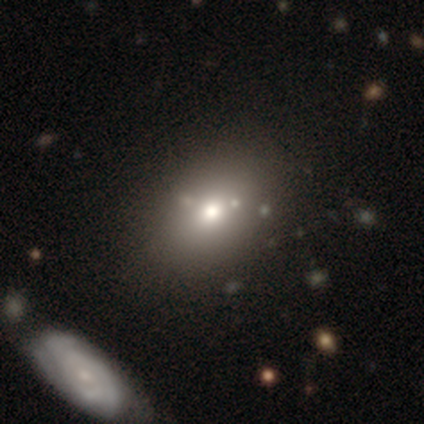

In [119]:
Image.open(features_df['filename'][0])

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(150000, 2)

(-4.236965117972954,
 10.627430854362112,
 -3.7690386310406163,
 14.460723353941006)

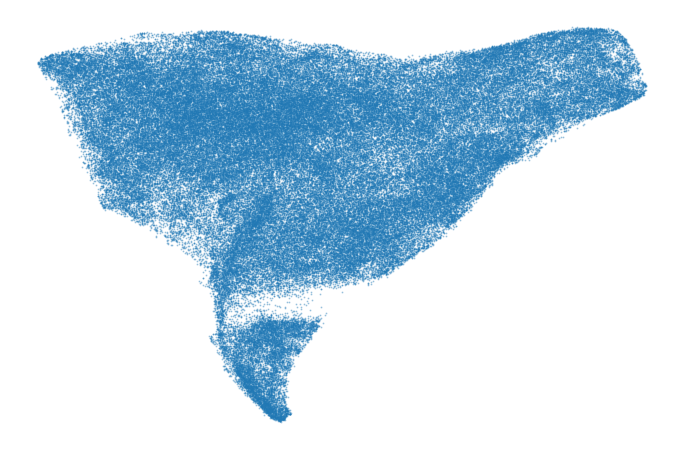

In [11]:
# contamination = 0.03

In [ ]:
# X = features_df[feature_cols].values
# clf = IsolationForest(n_jobs=-1, contamination=contamination)
# clf.fit(X)
# scores = clf.predict(X)
# decisions = clf.decision_function(X)
# show_galaxies(features_df.iloc[np.argsort(decisions)])
# raw, doens't work great

In [13]:
from sklearn.decomposition import IncrementalPCA

Text(0, 0.5, 'Explained Variance')

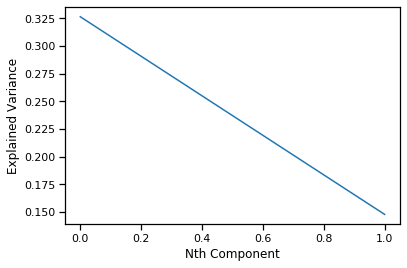

In [49]:


n_components = 2
pca = IncrementalPCA(n_components=n_components)
reduced_embed = pca.fit_transform(features_df[feature_cols].values)  # 30k

plt.plot(range(n_components), pca.explained_variance_ratio_)
plt.xlabel('Nth Component')
plt.ylabel('Explained Variance')

In [ ]:

# plt.plot(range(n_components), np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Nth Component')
# plt.ylabel('Total Explained Variance')

In [ ]:
# X_pca = pca.transform(X)
# fails for large data

In [ ]:

# clf = IsolationForest(n_jobs=-1,  contamination=contamination)
# clf.fit(X_pca)
# scores = clf.predict(X_pca)
# decisions = clf.decision_function(X_pca)

In [ ]:
# pd.value_counts(scores)

In [ ]:
# show_galaxies(features_df.iloc[np.argsort(decisions)])

In [11]:
# features_df = features_df.sample(60000)

In [131]:

reducer_10 = umap.UMAP(n_components=2, min_dist=.0, n_neighbors=5)
X_10 = reducer_10.fit_transform(features_df[feature_cols].values)

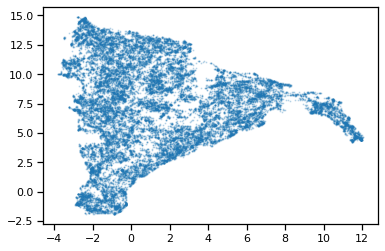

In [132]:
plt.scatter(X_10[:, 0], X_10[:, 1], s=1., alpha=.2)

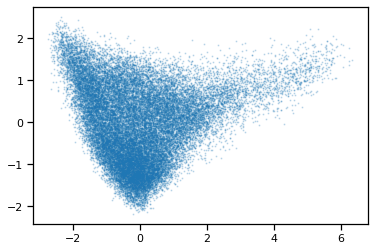

In [50]:
plt.scatter(reduced_embed[:, 0], reduced_embed[:, 1], s=1., alpha=.2)

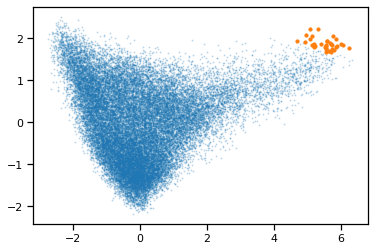

In [52]:
clf = IsolationForest(n_jobs=-1, contamination=contamination)
clf.fit(reduced_embed)
scores = clf.predict(reduced_embed)
decisions = clf.decision_function(reduced_embed)
# umap tends to find galaxies which are morphologically extreme - super smooth, super featured, or missing
#     pd.value_counts(scores)
anomaly_indices = np.argsort(decisions)[:36]

plt.scatter(reduced_embed[:, 0], reduced_embed[:, 1], s=1., alpha=.2)
plt.scatter(reduced_embed[anomaly_indices, 0], reduced_embed[anomaly_indices, 1], s=10.)

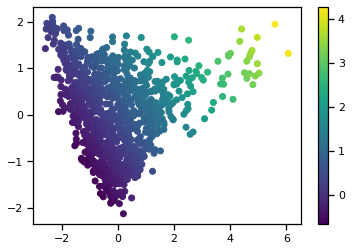

(array([1331., 5821., 9406., 7595., 3238., 1296.,  601.,  362.,  277.,
          73.]),
 array([-2.75379186, -1.84455857, -0.93532528, -0.02609198,  0.88314131,
         1.79237461,  2.7016079 ,  3.6108412 ,  4.52007449,  5.42930778,
         6.33854108]),
 <a list of 10 Patch objects>)

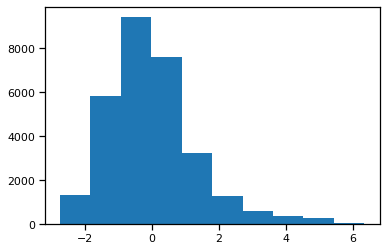

0.9212613914448308

In [15]:
blank_examples = list(features_df.iloc[np.argsort(decisions)][:200].index)
# blank_examples

In [19]:
blank_vols = vols[vols['iauname'].isin(blank_examples)]
len(blank_vols)

200

In [28]:
good_vols = vols[vols['iauname'].isin(good_galaxies)]

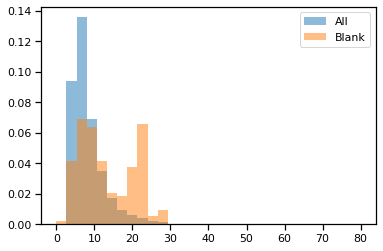

In [29]:
fig, ax = plt.subplots()
alpha = .5
_, bins = np.histogram(np.linspace(0., 80.), 30)
ax.hist(good_vols['petro_th90'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['petro_th90'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

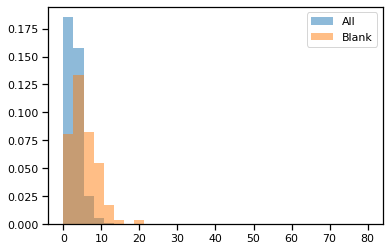

In [30]:
fig, ax = plt.subplots()
alpha = .5
ax.hist(good_vols['petro_th50'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['petro_th50'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

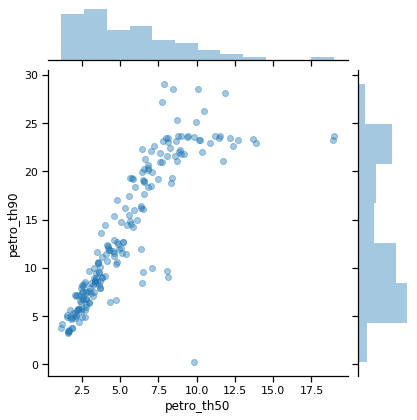

In [24]:
sns.jointplot(blank_vols['petro_th50'], blank_vols['petro_th90'], alpha=.4)

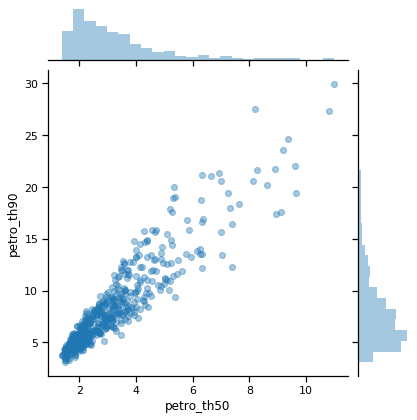

In [31]:
some_vols = good_vols.sample(500)
sns.jointplot(some_vols['petro_th50'], some_vols['petro_th90'], alpha=.4)

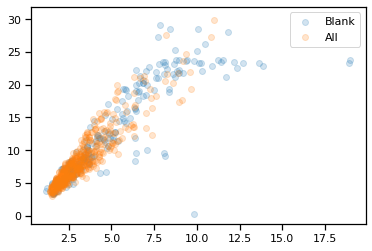

In [37]:
plt.scatter(blank_vols['petro_th50'], blank_vols['petro_th90'], alpha=.2, label='Blank')
plt.scatter(some_vols['petro_th50'], some_vols['petro_th90'], alpha=.2, label='All')
plt.legend()

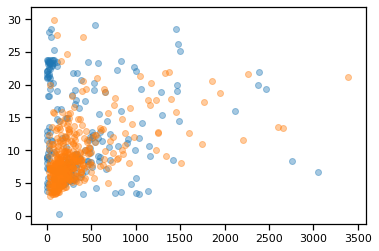

In [35]:
plt.scatter(blank_vols['sersic_nmgy_r'], blank_vols['petro_th90'], alpha=.4)
plt.scatter(some_vols['sersic_nmgy_r'], some_vols['petro_th90'], alpha=.4)

th50 < 20, th90 < 30 seems like the next sensible cut

In [ ]:

cuts = np.linspace(100, 10000)
blank_frac = []
vol_frac = []
for cut in cuts:
    blank_frac.append((blank_vols['sersic_nmgy_r'] > cut).mean())
    vol_frac.append((vols['sersic_nmgy_r'] > cut).mean())

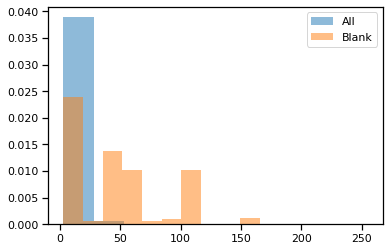

In [106]:
fig, ax = plt.subplots()
alpha = .5
ax.hist(vols['petro_theta'], label='All', alpha=alpha, density=True)
ax.hist(blank_vols['petro_theta'], label='Blank', alpha=alpha, density=True)
ax.legend()

In [101]:
# fig, ax = plt.subplots()
# alpha = .5
# ax.hist(some_vols['elpetro_absmag_r'], label='All', alpha=alpha, density=True)
# ax.hist(blank_vols['elpetro_absmag_r'], label='Blank', alpha=alpha, density=True)
# ax.legend()

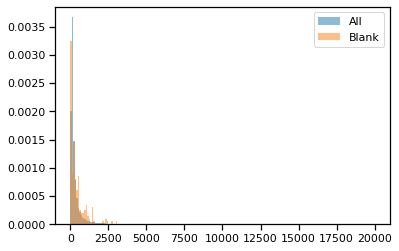

In [33]:
fig, ax = plt.subplots()
alpha = .5
_, bins = np.histogram(np.linspace(0., 20000), 200)
ax.hist(vols['sersic_nmgy_r'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['sersic_nmgy_r'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

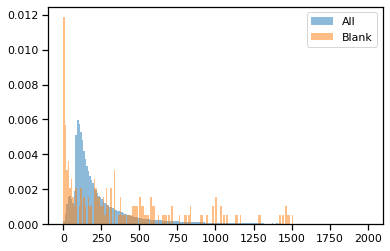

In [34]:
fig, ax = plt.subplots()
alpha = .5
_, bins = np.histogram(np.linspace(0., 2000), 200)
ax.hist(vols['sersic_nmgy_r'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['sersic_nmgy_r'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

In [69]:

cuts = np.linspace(100, 10000)
blank_frac = []
vol_frac = []
for cut in cuts:
    blank_frac.append((blank_vols['sersic_nmgy_r'] > cut).mean())
    vol_frac.append((vols['sersic_nmgy_r'] > cut).mean())

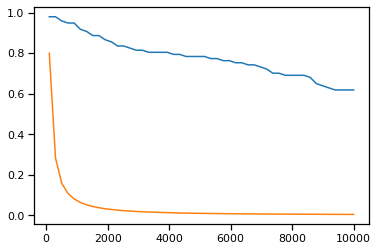

In [70]:
plt.plot(cuts, blank_frac)
plt.plot(cuts, vol_frac)

So a cut of ~3500 or so should remove 80% of the blanks and almost none of the main sample

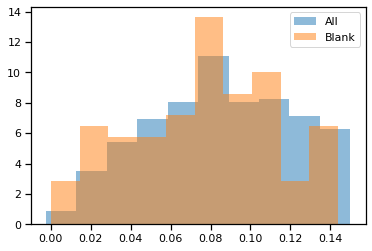

In [58]:
fig, ax = plt.subplots()
alpha = .5

ax.hist(vols['redshift'], label='All', alpha=alpha, density=True)
ax.hist(blank_vols['redshift'], label='Blank', alpha=alpha, density=True)
ax.legend()

In [25]:
vols.columns.values

array(['iauname', 'ra', 'dec', 'redshift', 'elpetro_absmag_r',
       'sersic_nmgy_r', 'petro_th50', 'petro_th90', 'petro_theta',
       'upload_group', 'active_learning_on', 'in_gzd_ab', 'png_loc',
       'smooth-or-featured_total-votes', 'smooth-or-featured_smooth',
       'smooth-or-featured_smooth_fraction',
       'smooth-or-featured_featured-or-disk',
       'smooth-or-featured_featured-or-disk_fraction',
       'smooth-or-featured_artifact',
       'smooth-or-featured_artifact_fraction', 'disk-edge-on_total-votes',
       'disk-edge-on_yes', 'disk-edge-on_yes_fraction', 'disk-edge-on_no',
       'disk-edge-on_no_fraction', 'has-spiral-arms_total-votes',
       'has-spiral-arms_yes', 'has-spiral-arms_yes_fraction',
       'has-spiral-arms_no', 'has-spiral-arms_no_fraction',
       'bar_total-votes', 'bar_strong', 'bar_strong_fraction', 'bar_weak',
       'bar_weak_fraction', 'bar_no', 'bar_no_fraction',
       'bulge-size_total-votes', 'bulge-size_dominant',
       'bulge-size_do

In [98]:
from sklearn import preprocessing

In [99]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

In [100]:
X_10_trans = quantile_transformer.fit_transform(X_10)

(array([  814.,  2206.,  4161.,  7786., 11628.,  9207.,  6418.,  6456.,
         8809.,  2515.]),
 array([2.2333853, 2.9804828, 3.7275803, 4.4746776, 5.221775 , 5.9688725,
        6.71597  , 7.4630675, 8.210165 , 8.957263 , 9.70436  ],
       dtype=float32),
 <a list of 10 Patch objects>)

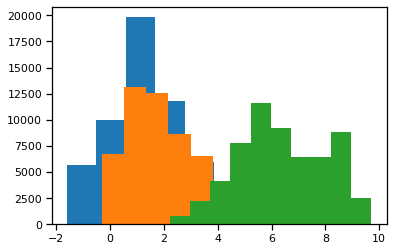

In [94]:
plt.hist(X_10[:, 0])
plt.hist(X_10[:, 1])
plt.hist(X_10[:, 2])

(array([6002., 5995., 6004., 6006., 5989., 6005., 6000., 6004., 5993.,
        6002.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

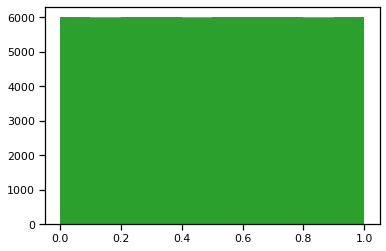

In [101]:
plt.hist(X_10_trans[:, 0])
plt.hist(X_10_trans[:, 1])
plt.hist(X_10_trans[:, 2])

In [143]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

In [2]:
plt.scatter(X_50[:, 0], X_50[:, 1], s=1.,  alpha=.2)

NameError: name 'plt' is not defined

In [ ]:
n_clusters = 20

# clf = KMeans(n_clusters=n_clusters, n_jobs=-1).fit(X_10)
# preds = clf.predict(X_10)

clf = SpectralClustering(n_clusters=n_clusters, n_jobs=-1).fit(X_10)
preds = clf.predict(X_50)


# preds = DBSCAN(n_jobs=-1, eps=.01, min_samples=50, metric="l2").fit_predict(X_10)

In [ ]:
pd.value_counts(preds)

In [114]:
clf.predict

AttributeError: 'KMeans' object has no attribute 'predict_proba'